In [2]:
import cv2
import glob
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import load_img, img_to_array 
from keras.applications.inception_v3 import preprocess_input
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
DATA_DIR = "C:\\Devanagari\\Data\\Train"
os.chdir("C:\\Devanagari\\Data\\Train")

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        validation_split=0.05)
train_generator = train_datagen.flow_from_directory(
        'C:\\Devanagari\\Data\\Train\\',
        target_size=(32,32),
        batch_size=128,color_mode='grayscale',
        class_mode='categorical',
        subset='training')

val_generator = train_datagen.flow_from_directory(
        'C:\\Devanagari\\Data\\Train\\',
        target_size=(32,32),
        batch_size=128,color_mode='grayscale',
        class_mode='categorical',
        subset='validation')


Found 74290 images belonging to 46 classes.
Found 3910 images belonging to 46 classes.


In [4]:
lables = train_generator.class_indices

In [5]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Flatten
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers import Dropout

In [6]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2,seed=100))
model.add(Dense(160,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [7]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_generator,epochs=20,validation_data=val_generator)



Epoch 1/20
581/581 [==============================] - 77s 133ms/step - loss: 3.2979 - accuracy: 0.1438 - val_loss: 2.4207 - val_accuracy: 0.2256
Epoch 2/20
581/581 [==============================] - 81s 139ms/step - loss: 2.1206 - accuracy: 0.4112 - val_loss: 2.2167 - val_accuracy: 0.4179
Epoch 3/20
581/581 [==============================] - 87s 149ms/step - loss: 1.4530 - accuracy: 0.5798 - val_loss: 1.4151 - val_accuracy: 0.5307
Epoch 4/20
581/581 [==============================] - 83s 142ms/step - loss: 1.1325 - accuracy: 0.6664 - val_loss: 1.5126 - val_accuracy: 0.6064
Epoch 5/20
581/581 [==============================] - 85s 147ms/step - loss: 0.9626 - accuracy: 0.7120 - val_loss: 1.1584 - val_accuracy: 0.6297
Epoch 6/20
581/581 [==============================] - 83s 143ms/step - loss: 0.8424 - accuracy: 0.7469 - val_loss: 1.2663 - val_accuracy: 0.6703
Epoch 7/20
581/581 [==============================] - 86s 148ms/step - loss: 0.7685 - accuracy: 0.7691 - val_loss: 1.1832 - val_a

In [9]:
test = pd.read_csv('/Documents/Devanagari/Data/test_X.csv')

In [10]:
test = np.array(test)
test = test/255.0
test = test.reshape(test.shape[0],32,32,1)

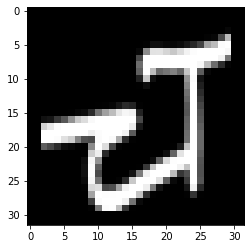

In [20]:
import matplotlib.pyplot as plt
plt.imshow(test[1570,:,:].reshape(32,32), cmap='gray')

In [21]:
p = model.predict_proba(test[1570,:,:].reshape(1,32,32,1))
p

array([[4.64236254e-11, 3.53641785e-13, 6.12143836e-10, 4.04485430e-12,
        5.11637746e-11, 2.46494990e-13, 3.10471351e-15, 2.56700325e-03,
        1.69398207e-09, 1.41643640e-03, 1.54971278e-13, 1.29290259e-11,
        1.10536948e-08, 4.82740870e-09, 3.66813177e-12, 5.37611400e-10,
        2.54660095e-11, 1.07681037e-04, 9.11888967e-12, 7.12750414e-11,
        4.06130374e-09, 3.05239412e-09, 8.38915426e-08, 4.01733638e-12,
        4.05999399e-13, 2.24000031e-13, 1.85095395e-09, 1.53554516e-10,
        2.94805494e-13, 8.78527917e-10, 4.24388272e-04, 1.70442203e-08,
        9.95484352e-01, 4.50463915e-08, 4.84985996e-10, 5.27964445e-15,
        4.00041545e-12, 1.09511695e-14, 1.61222110e-13, 8.09488327e-12,
        1.42945135e-11, 5.90205570e-16, 1.56382607e-09, 2.13343898e-10,
        4.52230649e-11, 5.60997266e-13]], dtype=float32)

In [22]:
np.argmax(p)

32

In [14]:
lables

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 